# Домашняя работа 8. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #8: Name Surname`. Если тема будет неправильная, то задание не будет проверено.
6. Дедлайн: 18.12.2017 01:00 OMSK
7. После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

Рассылка решений: 25.12.2017 17:00 OMSK
После рассылки задания почти совсем не имеют веса.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиции деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/winequality-red.csv.gz', delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


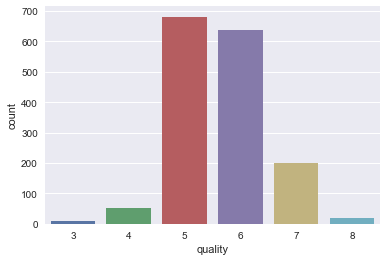

In [3]:
sns.countplot(x='quality', data=df)

данные не сбалансированы, обычно все оценивают вино средним и никогда слишком плохим или слишком хорошим

In [4]:
X = df.drop("quality", axis=1)
y = df["quality"]

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [6]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

clf_kn = KNeighborsClassifier(n_neighbors=10, n_jobs=4)
%time clf_kn.fit(X, y)

cross_val_score(clf_kn, X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 5 ms


0.51221982758620688

In [7]:
clf_kn_scaled = KNeighborsClassifier(n_neighbors=10, n_jobs=4)
%time clf_kn_scaled.fit(X_scaled, y)

cross_val_score(clf_kn_scaled, X_scaled, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 5 ms


0.57975313479623825

In [8]:
clf_ridge = RidgeClassifier(random_state=42)
%time clf_ridge.fit(X, y)

cross_val_score(clf_ridge, X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 11 ms


0.58353840125391854

In [9]:
clf_tree = DecisionTreeClassifier(random_state=42)
%time clf_tree.fit(X, y)

cross_val_score(clf_tree, X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 27 ms


0.61852076802507827

In [10]:
clf_bagging = BaggingClassifier(n_estimators=100, n_jobs=4, random_state=42)
%time clf_bagging.fit(X, y)

cross_val_score(clf_bagging, X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 1.96 s


0.69546042319749213

In [11]:
clf_bagging_half = BaggingClassifier(n_estimators=100, max_features=.5, n_jobs=4, random_state=42)
%time clf_bagging_half.fit(X, y)

cross_val_score(clf_bagging_half, X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 1.75 s


0.69921630094043885

In [12]:
clf_forest  = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=42)
%time clf_forest .fit(X, y)

cross_val_score(clf_forest , X, y, scoring='accuracy', cv=kf, n_jobs=4).mean()

Wall time: 335 ms


0.70109130094043892

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

1. т.к. разные признаки вносят разный вклад, их стоит отмасштсбировать так, чтобы учитывался их вес, тем самым важные признаки будут оказывать наибольшее влияние
2. деревья и так учитывают в первую очередь клад важных признаков, т.к. устраивают разбиение в первую очередь по ним
3. так избегаем переобучения, т.к. делать обобщение проще только по наиболее значимым признакам
4. У первой меодели, т.к. предскание наиболее неточное, метрические алгоритмы страдают из за проклятия размерности, по тому данные нужно масштабировать 

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятсья делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [13]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
X_dig, y_dig = load_digits(return_X_y=True)

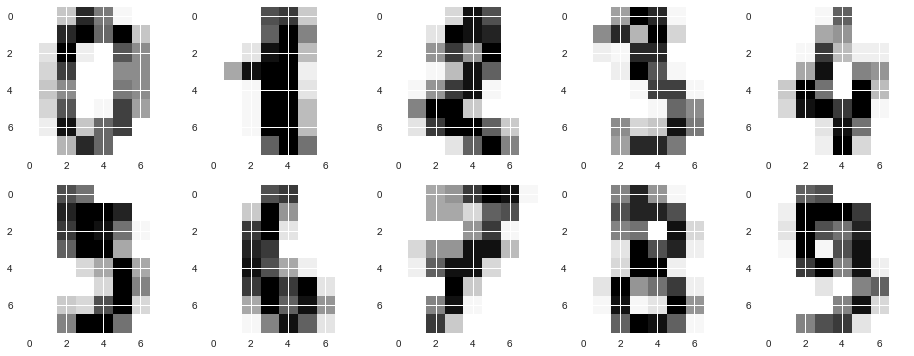

In [14]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_dig[i,:].reshape([8,8]))

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [15]:
scores_tree = cross_val_score(clf_tree, X_dig, y_dig, cv=10, scoring='accuracy')
print("Accuracy DecisionTreeClassifier: {}".format(scores_tree.mean()))
print("StdAccuracy DecisionTreeClassifier: {}".format(scores_tree.std()))

Accuracy DecisionTreeClassifier: 0.8370850802141552
StdAccuracy DecisionTreeClassifier: 0.04023050598893108


In [16]:
scores_bagging = cross_val_score(clf_bagging, X_dig, y_dig, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier: {}".format(scores_bagging.mean()))
print("StdAccuracy BaggingClassifier: {}".format(scores_bagging.std()))

Accuracy BaggingClassifier: 0.9266223799121667
StdAccuracy BaggingClassifier: 0.0333050023022444


In [17]:
clf_bagging_mf = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(len(X_dig[0]))), n_jobs=4, random_state=42)

scores_bagging_mf = cross_val_score(clf_bagging_mf, X_dig, y_dig, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier2: {}".format(scores_bagging_mf.mean()))
print("StdAccuracy BaggingClassifier2: {}".format(scores_bagging_mf.std()))

Accuracy BaggingClassifier2: 0.9311692335245662
StdAccuracy BaggingClassifier2: 0.035212933332060735


In [18]:
clf_bagging_mf2  = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_features=int(np.sqrt(len(X_dig[0])))), n_estimators=100, n_jobs=4, random_state=42)

scores_bagging_mf2 = cross_val_score(clf_bagging_mf2, X_dig, y_dig, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier2: {}".format(scores_bagging_mf2.mean()))
print("StdAccuracy BaggingClassifier2: {}".format(scores_bagging_mf2.std()))

Accuracy BaggingClassifier2: 0.9533321022473988
StdAccuracy BaggingClassifier2: 0.020694067859313794


In [19]:
scores_forest = cross_val_score(clf_forest, X_dig, y_dig, cv=10, scoring='accuracy')
print("Accuracy RandomForestClassifier: {}".format(scores_forest.mean()))
print("StdAccuracy RandomForestClassifier: {}".format(scores_forest.std()))

Accuracy RandomForestClassifier: 0.9533106688723997
StdAccuracy RandomForestClassifier: 0.020680012777850015


### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [20]:
estimators = [1,5,10,15,50,100,150,200,300]
scores = []

for e in estimators:
    clf = RandomForestClassifier(n_estimators=e, n_jobs=4, random_state=42)
    print(e, 'trees')
    %time clf.fit(X_dig, y_dig)
    score = cross_val_score(clf, X_dig, y_dig, scoring='accuracy', cv=10, n_jobs=4).mean()
    print('Score:', score)
    
    scores.append(score)

1 trees
Wall time: 116 ms
Score: 0.761635733552
5 trees
Wall time: 111 ms
Score: 0.883702869674
10 trees
Wall time: 133 ms
Score: 0.927202121785
15 trees
Wall time: 126 ms
Score: 0.941717861426
50 trees
Wall time: 152 ms
Score: 0.955011386465
100 trees
Wall time: 314 ms
Score: 0.953310668872
150 trees
Wall time: 515 ms
Score: 0.948331555706
200 trees
Wall time: 610 ms
Score: 0.949973868701
300 trees
Wall time: 931 ms
Score: 0.951622990901


Optimal quantity of estimators: 50


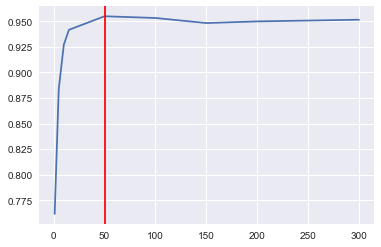

In [21]:
arg = np.argmax(scores)

plt.plot(estimators, scores)
plt.axvline(estimators[arg], color='r')

print('Optimal quantity of estimators:', estimators[arg])

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

In [22]:
features = np.append([1], range(4, 65, 4))
scores = []

for e in features:
    clf = RandomForestClassifier(n_estimators=100, max_features=e, n_jobs=4, random_state=42)
    print('features:', e)
    %time clf.fit(X_dig, y_dig)
    score = cross_val_score(clf, X_dig, y_dig, scoring='accuracy', cv=10, n_jobs=4).mean()
    print('Score:', score)
    print()
    
    scores.append(score)

features: 1
Wall time: 355 ms
Score: 0.951667794048

features: 4
Wall time: 347 ms
Score: 0.960037515214

features: 8
Wall time: 315 ms
Score: 0.953310668872

features: 12
Wall time: 414 ms
Score: 0.951091013339

features: 16
Wall time: 432 ms
Score: 0.948352750518

features: 20
Wall time: 442 ms
Score: 0.946065352762

features: 24
Wall time: 537 ms
Score: 0.94887199695

features: 28
Wall time: 962 ms
Score: 0.940487146243

features: 32
Wall time: 694 ms
Score: 0.946022775544

features: 36
Wall time: 765 ms
Score: 0.94155574176

features: 40
Wall time: 680 ms
Score: 0.944932135795

features: 44
Wall time: 701 ms
Score: 0.94050591701

features: 48
Wall time: 951 ms
Score: 0.939998650243

features: 52
Wall time: 1.05 s
Score: 0.933840355282

features: 56
Wall time: 1.15 s
Score: 0.928777408226

features: 60
Wall time: 1.39 s
Score: 0.92938833508

features: 64
Wall time: 886 ms
Score: 0.926606649409



### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?



1. качество классификатора увелиичивается, пока не начинает переобучаться, оптимальное значение находится в районе 50
2. как и с числом деревьев имеется некое оптимальное число
3. если фичей будет мало, то классификатор недообучается, если их будет слишком много, то признаки, которые не имеют значения начнут вносить свой вклад, из за чего возникнет переобучение
4. при слишком большой глубине дерево перестанет обощать данные и заточится под конкретную выборку, деревья не стоит делать слишком глубокими

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)